# Homicide Prediction Model
### by Sara Basili

## Introduction

This notebook was posted in coordination with a blog post. If you have not read it, please do so here: https://medium.com/@saraelizabethbasili/homicide-prediction-model-e01ce47cfbdb

A link to the GitHub repository for this project may be found here: https://github.com/warabasil/HomicidePredictionModel


According to the Metropolitan Crime Commission, New Orleans has been recently declared the murder capital of the United States. The main objective of this project is to predict the likelihood of a homicide happening in the greater area of New Orleans, based on the electronic police reports filed in the year 2022. Being able to better understand the probability of a homicide happening in a specific district could bring insights about the spatial and temporal patterns of violent crime, including the seasonality, clustering, and distribution of homicide occurrences. The project aims to develop a machine learning model that can predict the likelihood of a homicide in a specific neighborhood based on various demographic factors. The algorithms will be trained on a subset of the data, and then tested on the remaining data to evaluate their accuracy in predicting homicides. The model could provide significant findings for policymakers and law enforcement agencies to better understand the homicide patterns in various areas across the Orleans parish. The report includes the methodology and results of the analysis, as well as the ethical considerations and potential biases linked with this approach to predictive modeling. 
The data utilized for this project is a public dataset retrieved from the open data portal for the city of New Orleans. 

A link to this portal is provided here: https://datadriven.nola.gov/home/

The analysis is based on the Electronic Police Reports for the year 2022 in the city of New Orleans. This includes all police reports filed by New Orleans Police Department (NOPD) officers, containing incident and supplemental reports. The dataset contains approximately 90,000 observations and 23 features. Each police report is described by an item number, district, location, disposition, signal, charges, offender race, offender gender, offender age, victim age, victim gender, and victim race. This dataset may change dynamically due to Police Reports being updated when subsequent information is determined as a result of an investigation. 

The following disclaimer has been provided by the NOPD through the City of New Orleans website:

*"The New Orleans Police Department does not guarantee (either expressed or implied) the accuracy, completeness, timeliness, or correct sequencing of the information. The New Orleans Police Department will not be responsible for any error or omission, or for the use of, or the results obtained from the use of this information. For instance, the data contains ages that may be negative due to data entry errors. NOPD has chosen to publish the data as it exists in the source systems for transparency and has instituted data validation where appropriate to ensure quality data in the future. All data visualizations on maps should be considered approximate and attempts to derive specific addresses are strictly prohibited. The New Orleans Police Department is not responsible for the content of any off-site pages that are referenced by or that reference this web page other than an official City of New Orleans or New Orleans Police Department web page. The user specifically acknowledges that the New Orleans Police Department is not responsible for any defamatory, offensive, misleading, or illegal conduct of other users, links, or third parties and that the risk of injury from the foregoing rests entirely with the user. Any use of the information for commercial purposes is strictly prohibited. The unauthorized use of the words "New Orleans Police Department," "NOPD," or any colorable imitation of these words or the unauthorized use of the New Orleans Police Department logo is unlawful. This web page does not, in any way, authorize such use."*



### Environment Setup
The environment for this project can be downloaded from https://drive.google.com/file/d/1c3zxcJTvI68f_ikKATp0xOFME4_l9mgm/view

This dataset was downloaded from the City of New Orleans website and was last updated in January 1st, 2023. To preserve the state of the dataset, a copy was downloaded and stored on Kaggle, which is linked here: https://www.kaggle.com/datasets/sarabasili/electronic-police-reports-2022

To run the code in this project yourself, you will need to download the dataset from Kaggle and store it in the same directory as this notebook. Additionally, although there are no additional modules used in this project, an environment.yml file has been provided to create a conda environment with all the necessary packages to run the code. To create the environment, run the following command in the terminal while located in the same directory as the environment.yml file:

    conda env create -f environment.yml

If you have done both, you should have all the necessary requirements to run this project.

### Ethical Concerns and Possible Biases

When using machine learning models to predict crime data, several ethical problems and biases may arise. The first concern involves possible biases in the training data. If the training data utilized to train the machine model is biased, the model itself will also be biased. The data often only focuses on offenses generally associated with specific demographic groups and neighborhoods, crimes known as "street crimes" such as theft and carjackings. Domestic violence and white-collar crimes, such as fraud and embezzlement, on the other hand, tend to receive less attention and are not as reported. Overrepresentation or underrepresentation of a specific category in the data may lead to inconsistent results and an inaccurate representation of the world. If certain neighborhoods or demographic groups, for example, are overrepresented in the training data, the model may be more likely to predict crimes among those neighborhoods or racial/ethnic groups resulting in possible discrimination. This could sustain stereotypes and reinforce systemic biases in the criminal justice system, which could lead to negative consequences for marginalized communities. If a group of people begins to feel unfairly targeted by law enforcement based on such predictions, they may be less likely to engage in normal activities, resulting in a further marginalization of a specific community.

The data may also be subject to error, as it could have been entered into the system incorrectly by law enforcers or it could have been overlooked.
Another major concern involves self-fulfilling prophecies when resulting predictions are acted upon. If law enforcement officers are directed to increment surveillance in a specific area rather than another, the increased presence of police could lead to more arrests, which could then be used to justify the accuracy of the predictive model.

Predictive models on crime rates could further lead to preemptive punishments, in which individuals are punished based solely on their predicted likelihood of committing a crime as opposed to a crime they have actually committed.

It is important to keep into consideration these problems when building a predictive model using machine learning and observing its results. Taking into consideration all of these factors, this project, in order to better address the problem, is based solely on the prediction of homicides and attempted murders, crimes that tend to be reported with more consistency. 

## The Dataset
The dataset includes 93,008 instances of police reports, with 23 features describing various details about each report such as location or type of crime. The following describes each feature in detail:

**Item_Number** - The item number associated with the report.

**District** - The district number in which the incident was reported. NOPD refers to 8 different districts, denoted from 1 to 8.

**Location** - The street address of the incident. Each address number has been partially
obscured with Xs to reduce precision to the block level to protect the privacy of any sensitive parties.

**Disposition** - The disposition code associated with each report, which can be either "OPEN", "CLOSED" or "UNFOUNDED".

**Signal_Type** - The code associated with each incident type. Codes are defined by a combination of numbers and letters.

**Signal_Description** - The written description of the associated Signal_Type.

**Occurred_Date_Time** - Date and time in which the report was filed.

**Charge_Code** - The legal statute associated with each charge.

**Charge_Description** - The written description of the associated Charge_Code.

**Offender_Number** - The offender count associated with an Item_Number. Each Item_Number may have multiple offenders.

**OffenderID** - The ID number associated with each offender.

**OffenderStatus** - The status of the offender, which indicates whether the offender was arrested.

**Offender_Race** - The race of the offender, which, if present, can be either "WHITE", "BLACK", "UNKNOWN", "NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER", "ASIAN" or "AMER. IND.".

**Offender_Gender** - The gender of the offender, which, if present, can be either "FEMALE", "MALE" or "UNKNOWN".

**Offender_Age** - The numeric age of the offender, if present.

**Victim_Number** - The victim count associated with an Item_Number. Each Item_Number may have multiple victims.

**Person_Type** - The type of the person reported as "victim", which can be either "INTERVIEW", "MISSING JUVENILE", "MISSING PERSON", "NON-VICTIM", "REPORTING PERSON", "RUNAWAY JUVENILE", "VICTIM", "WITNESS".

**Victim_Race** - The race of the victim, which, if present, can be either "WHITE", "BLACK", "UNKNOWN", "NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER", "ASIAN" or "AMER. IND.".

**Victim_Gender** - The gender of the victim, which, if present, can be either "FEMALE", "MALE" or "UNKNOWN".

**Victim_Age** - The numeric age of the victim, if present.

**Victim_Fatal_Status** - The status of the victim, which indicates whether the incident was "Fatal" or "Non-Fatal".

**Hate.Crime** - The hate crime flag, which indicates whether the incident is associated with a hate crime.

**Report.Type** - The type of report, which can be either an "Incident Report" or a "Supplemental Report".






In [ ]:
import pandas as pd

data = pd.read_csv('Electronic_Police_Report_2022.csv')
# print useful information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93008 entries, 0 to 93007
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_Number          93008 non-null  object 
 1   District             93008 non-null  int64  
 2   Location             93008 non-null  object 
 3   Disposition          93008 non-null  object 
 4   Signal_Type          93008 non-null  object 
 5   Signal_Description   93008 non-null  object 
 6   Occurred_Date_Time   93008 non-null  object 
 7   Charge_Code          46591 non-null  object 
 8   Charge_Description   46591 non-null  object 
 9   Offender_Number      58182 non-null  float64
 10  OffenderID           58182 non-null  float64
 11  OffenderStatus       16033 non-null  object 
 12  Offender_Race        58157 non-null  object 
 13  Offender_Gender      58146 non-null  object 
 14  Offender_Age         22319 non-null  float64
 15  Victim_Number        90274 non-null 

In [ ]:
data.describe(include='all')

,Item_Number,District,Location,Disposition,Signal_Type,Signal_Description,Occurred_Date_Time,Charge_Code,Charge_Description,Offender_Number,...,Offender_Gender,Offender_Age,Victim_Number,PersonType,Victim_Race,Victim_Gender,Victim_Age,Victim_Fatal_Status,Hate Crime,Report Type
count,93008,93008.000000,93008,93008,93008,93008,93008,46591,46591,58182.000000,...,58146,22319.000000,90274.000000,90274,78877,78998,72061.000000,93008,36,93008
unique,54217,NaN,20562,3,153,153,39301,404,400,NaN,...,3,NaN,NaN,8,6,3,NaN,2,1,2
top,L-20229-22,NaN,004XX Bourbon St,OPEN,62C,SIMPLE BURGLARY (VEHICLE),2022-12-20 10:44:00,14 62,SIMPLE BURGLARY,NaN,...,MALE,NaN,NaN,VICTIM,BLACK,FEMALE,NaN,Non-fatal,Hate Crime,Incident Report
freq,112,NaN,519,75978,10345,10345,112,7922,7922,NaN,...,27751,NaN,NaN,54628,48464,39797,NaN,91986,36,80130
mean,NaN,4.837992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.184713,...,NaN,33.412877,1.498903,NaN,NaN,NaN,40.385077,NaN,NaN,NaN
std,NaN,2.343562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.625782,...,NaN,12.259542,1.275462,NaN,NaN,NaN,15.516365,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.000000,...,NaN,0.000000,-4.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,24.000000,1.000000,NaN,NaN,NaN,29.000000,NaN,NaN,NaN
50%,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,32.000000,1.000000,NaN,NaN,NaN,38.000000,NaN,NaN,NaN
75%,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,41.000000,2.000000,NaN,NaN,NaN,51.000000,NaN,NaN,NaN


In [ ]:
data.head()

,Item_Number,District,Location,Disposition,Signal_Type,Signal_Description,Occurred_Date_Time,Charge_Code,Charge_Description,Offender_Number,...,Offender_Gender,Offender_Age,Victim_Number,PersonType,Victim_Race,Victim_Gender,Victim_Age,Victim_Fatal_Status,Hate Crime,Report Type
0,C-00811-22,4,Bodenger Bd & Mardi Gras Bd,CLOSED,37,AGGRAVATED ASSAULT,2022-03-01 18:36:00,14 94,ILLEGAL USE OF WEAPONS,1.0,...,MALE,60.0,2.0,VICTIM,NaN,NaN,NaN,Non-fatal,NaN,Supplemental Report
1,G-01318-22,7,043XX Dodt Av #3,OPEN,103,DISTURBANCE,2022-07-02 09:00:00,NaN,NaN,NaN,...,NaN,NaN,1.0,REPORTING PERSON,BLACK,FEMALE,34.0,Non-fatal,NaN,Incident Report
2,F-08049-22,7,044XX Francis Dr,OPEN,56,SIMPLE CRIMINAL DAMAGE,2022-06-09 11:00:00,NaN,NaN,NaN,...,NaN,NaN,2.0,VICTIM,BLACK,MALE,NaN,Non-fatal,NaN,Incident Report
3,G-01211-22,5,006XX Reynes St,OPEN,67A,AUTO THEFT,2022-07-02 02:00:00,14 67.26,THEFT OF A MOTOR VEHICLE,1.0,...,UNKNOWN,NaN,1.0,VICTIM,BLACK,FEMALE,52.0,Non-fatal,NaN,Incident Report
4,G-01290-22,6,Carondelet St & Erato St,OPEN,24,MEDICAL,2022-07-02 08:24:00,NaN,NaN,NaN,...,NaN,NaN,1.0,VICTIM,BLACK,MALE,21.0,Non-fatal,NaN,Incident Report


## Data Preprocessing

Since the data from the police reports divides multiple types of homicides into different categories, The signal_description column was recoded to compress all of the homicide categories into a single binary result, 1 representing a homicide police report and 0 if it is a non-homicide related report. This will allow us to predict whether a police report is a homicide or not given certain features. 

As with a dataset like this, much of the data within each feature is NaN, which can pose a large problem when it comes to creating an accurate model. One may choose to impute the values, however this introduces a danger of contamination if our imputations are non-correlative. However, there are some features that could benefit from imputation. Since Victim and Offender Age are numeric values, it was fitting to simply impute the mean to all NaN values contained in the dataset. When it came to Victim Number and Offender Number, cases that had NaN meant that the crime involved 0 victims/offenders (or an unknown number), so an imputation of 0 was used for all missing values. For the rest of the categorical values, the data was too complex to impute a common "easy" value, so UNKNOWN was imputed in place of NaN. With this method, we are able to use much more of the data than before with our models, which will substantially increase accuracy.

For all categorical features, the data was one-hot encoded so as to allow for a model to digest the information properly. 

The only features unused were ID related features such as ItemNumber and OffenderID. While Location and Time would be useful features, their one-hot encoding were found to be too large to be used in our models, so they were dropped.

The result of our data was a dataset with 93,008 instances and 1,010 features.

In [ ]:
data['Signal_Description'].unique()

array(['AGGRAVATED ASSAULT', 'DISTURBANCE', 'SIMPLE CRIMINAL DAMAGE',
       'AUTO THEFT', 'MEDICAL', 'THEFT BY FRAUD',
       'THEFT FROM EXTERIOR OF VEHICLE', 'DISTURBANCE (DOMESTIC)',
       'FUGITIVE ATTACHMENT', 'SUSPICIOUS PERSON',
       'MISCELLANEOUS INCIDENT', 'SIMPLE BURGLARY (VEHICLE)',
       'SIMPLE CRIMINAL DAMAGE (DOMESTIC)', 'SIMPLE BATTERY (DOMESTIC)',
       'MISSING ADULT', 'AGGRAVATED BATTERY (SHOOTING)', 'SIMPLE BATTERY',
       'DEATH', 'CRUELTY TO A JUVENILE', 'OUT OF PARISH VEHICLE RECOVERY',
       'SHOPLIFTING', 'LOST PROPERTY', 'ARMED CARJACKING',
       'SIMPLE BURGLARY', 'SIMPLE BURGLARY (RESIDENCE)',
       'SIMPLE BURGLARY (BUSINESS)', 'ILLEGAL CARRYING OF A GUN', 'THEFT',
       'ARMED ROBBERY (GUN)', 'THREATS', 'AGGRAVATED CRIMINAL DAMAGE',
       'DRUG LAW VIOLATION', 'ATTEMPTED SUICIDE', 'DISTURBANCE (FIGHT)',
       'THREATS (DOMESTIC)', 'DISTURBANCE (MENTAL)', 'AGGRAVATED RAPE',
       'INDECENT BEHAVIOR WITH A JUVENILE', 'SIMPLE RAPE',
       'CON

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def extract_street_name(address):
    return ' '.join(address.split()[1:]).strip()
# Encoding type of crime as 1 if it is a homicide-related crime and 0 otherwise
homocides = ['ATTEMPTED MURDER', 'ATTEMPTED MURDER (DOMESTIC)', 'ATTEMPTED MURDER (SHOOTING)', 'HOMICIDE', 'HOMICIDE (CUTTING)', 'HOMICIDE (DOMESTIC)', 'HOMICIDE (SHOOTING)']
data['Signal_Description'] = data['Signal_Description'].apply(lambda x: 1 if x in homocides else 0)

# Impute missing values for numeric features
data['Victim_Age'] = data['Victim_Age'].fillna(data['Victim_Age'].mean())
data['Offender_Age'] = data['Offender_Age'].fillna(data['Offender_Age'].mean())

# Create new category 'UNKNOWN' for missing categorical values
categorical_columns = ['District', 'Disposition', 'Signal_Type', 'Charge_Code', 'Charge_Description', 'OffenderStatus', 'Offender_Race', 'Offender_Gender', 'PersonType', 'Victim_Race', 'Victim_Gender', 'Victim_Fatal_Status', 'Hate Crime', 'Report Type']
for column in categorical_columns:
    print(column)
    data[column] = data[column].fillna('UNKNOWN')

# # Extract street names from 'Location' column
# data['Street_Name'] = data['Location'].apply(extract_street_name)

# impute 0 for offender and victims where NaN exists
data['Victim_Number'] = data['Victim_Number'].fillna(0)
data['Offender_Number'] = data['Offender_Number'].fillna(0)
# Exclude non-informative ID-like columns
data = data.drop(columns=['Item_Number', 'OffenderID', 'Occurred_Date_Time', 'Location'])

# Perform one-hot encoding on categorical columns
# categorical_columns.append('Street_Name')
data = pd.get_dummies(data, columns=categorical_columns)

# Renaming and moving Signal_Description column to the front
classification = data.pop('Signal_Description')
data.insert(0, 'Homicide', classification)
data

District
Disposition
Signal_Type
Charge_Code
Charge_Description
OffenderStatus
Offender_Race
Offender_Gender
PersonType
Victim_Race
Victim_Gender
Victim_Fatal_Status
Hate Crime
Report Type


,Homicide,Offender_Number,Offender_Age,Victim_Number,Victim_Age,District_1,District_2,District_3,District_4,District_5,...,Victim_Race_WHITE,Victim_Gender_FEMALE,Victim_Gender_MALE,Victim_Gender_UNKNOWN,Victim_Fatal_Status_Fatal,Victim_Fatal_Status_Non-fatal,Hate Crime_Hate Crime,Hate Crime_UNKNOWN,Report Type_Incident Report,Report Type_Supplemental Report
0,0,1.0,60.000000,2.0,40.385077,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,1
1,0,0.0,33.412877,1.0,34.000000,0,0,0,0,0,...,0,1,0,0,0,1,0,1,1,0
2,0,0.0,33.412877,2.0,40.385077,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,0
3,0,1.0,33.412877,1.0,52.000000,0,0,0,0,1,...,0,1,0,0,0,1,0,1,1,0
4,0,0.0,33.412877,1.0,21.000000,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93003,0,3.0,33.412877,1.0,37.000000,0,0,0,0,0,...,0,1,0,0,0,1,0,1,1,0
93004,0,1.0,33.412877,1.0,40.385077,0,0,0,0,1,...,0,0,0,1,0,1,0,1,0,1
93005,0,1.0,33.412877,1.0,40.385077,0,0,0,0,1,...,0,0,0,1,0,1,0,1,0,1
93006,0,0.0,33.412877,1.0,31.000000,0,0,0,1,0,...,0,1,0,0,0,1,0,1,1,0


In [ ]:
print(data['Homicide'].value_counts())
print("NaN values in the dataset:", data.isna().sum().sum())
print("Infinity values in the dataset:", np.isinf(data).sum().sum())


0    92593
1      415
Name: Homicide, dtype: int64
NaN values in the dataset: 0
Infinity values in the dataset: 0


To reduce the dimensions of our dataset to a more manageable size, we used Random Forest to select the most important features. A cutoff of 120 features was set to retain at least 99.5% of the original dataset's variance. The graphs below show each feature ordered by importance along with various feature cutoffs to come to the 130 feature cutoff conclusion.

In [ ]:
# Assign features of data to X and target of classification to Y
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

print('Labels counts in Y:', np.bincount(y))
print('Labels counts in Y_train:', np.bincount(y_train))
print('Labels counts in Y_test:', np.bincount(y_test))

# Training a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))

# Displaying feature importance
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

Labels counts in Y: [92593   415]
Labels counts in Y_train: [64811   294]
Labels counts in Y_test: [27782   121]
Accuracy: 0.9994982618356449
                                                    importance
Signal_Type_30S                                       0.413180
Charge_Description_SECOND DEGREE MURDER               0.086976
Charge_Code_14 30.1                                   0.057740
Charge_Code_14 30                                     0.035725
Charge_Description_FIRST DEGREE MURDER                0.032608
...                                                        ...
Charge_Description_ATTEMPT - FIRST DEGREE ROBBERY     0.000000
Charge_Code_14 62.5                                   0.000000
Charge_Description_ATTEMPT - DISARMING A PEACE ...    0.000000
Charge_Description_ATTEMPT - CRUELTY TO JUVENILES     0.000000
Charge_Code_40 971                                    0.000000

[1009 rows x 1 columns]


(93008, 130)
Accuracy (reduced features): 0.9998566462387557


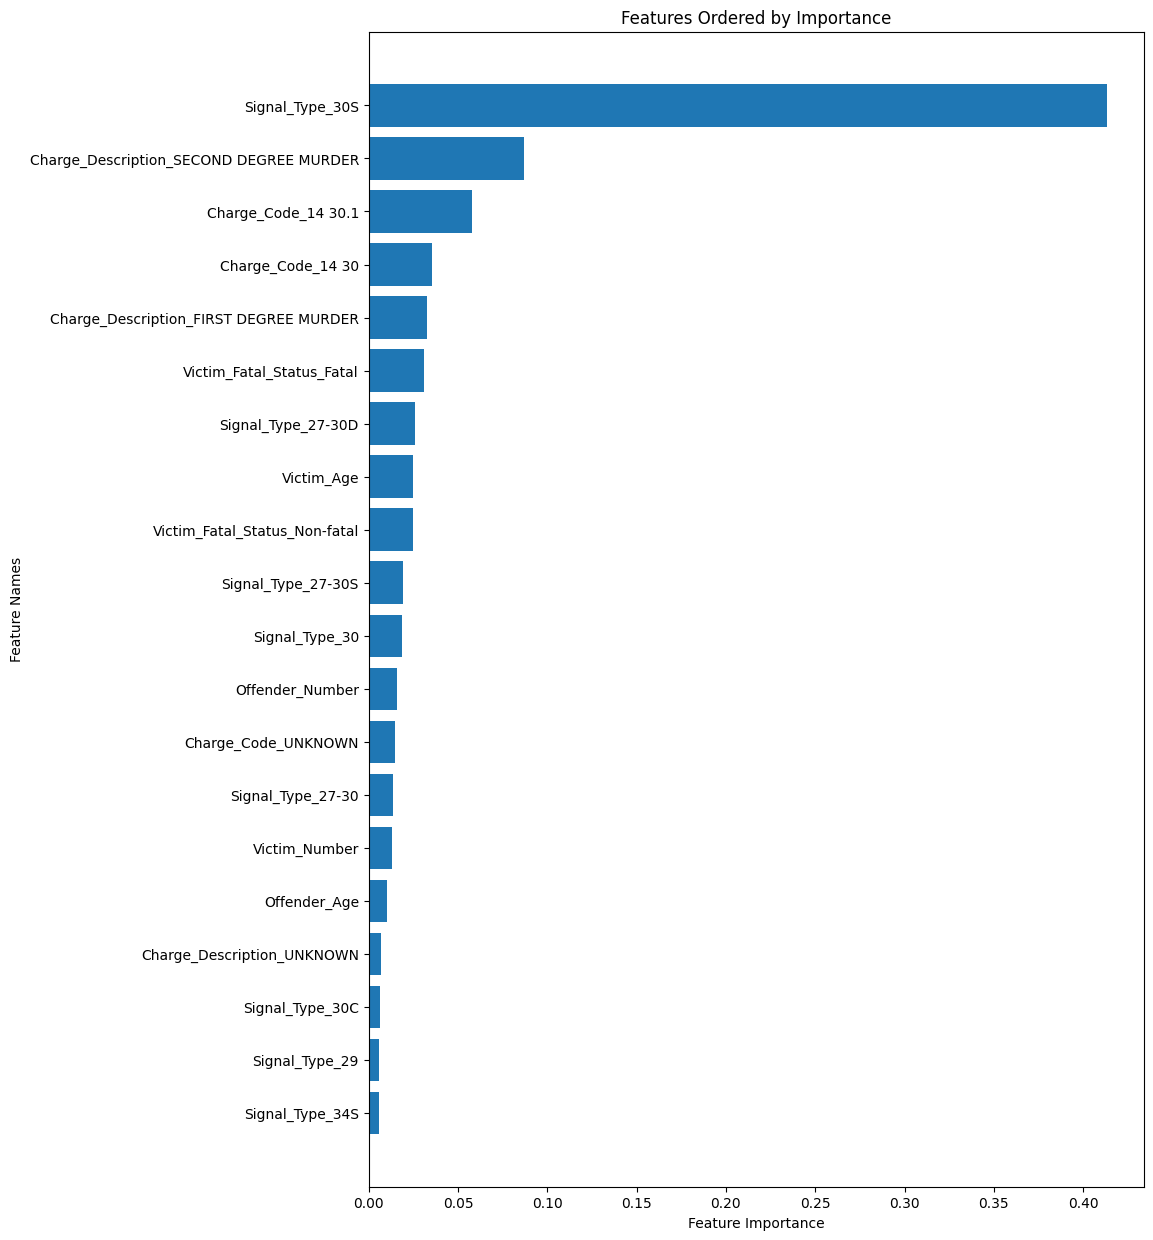

In [ ]:
# selecting top N features
N = 130
top_n_features = feature_importances.nlargest(N, 'importance')
selected_features = top_n_features.index

reduced_data = data[selected_features]
print(reduced_data.shape)

# Training a Random Forest classifier on reduced dataset
X_reduced = reduced_data.values
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y, test_size=0.30, random_state=1)

rf_reduced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_reduced.fit(X_train_reduced, y_train_reduced)

y_pred_reduced = rf_reduced.predict(X_test_reduced)
print("Accuracy (reduced features):", accuracy_score(y_test_reduced, y_pred_reduced))

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 15))
ax.barh(top_n_features.index[:20], top_n_features['importance'][:20])
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Feature Names')
ax.set_title('Features Ordered by Importance')

X_train = X_train_reduced
y_train = y_train_reduced
X_test = X_test_reduced
y_test = y_test_reduced

plt.gca().invert_yaxis()  # Invert y-axis to display the most important features on top
plt.show()

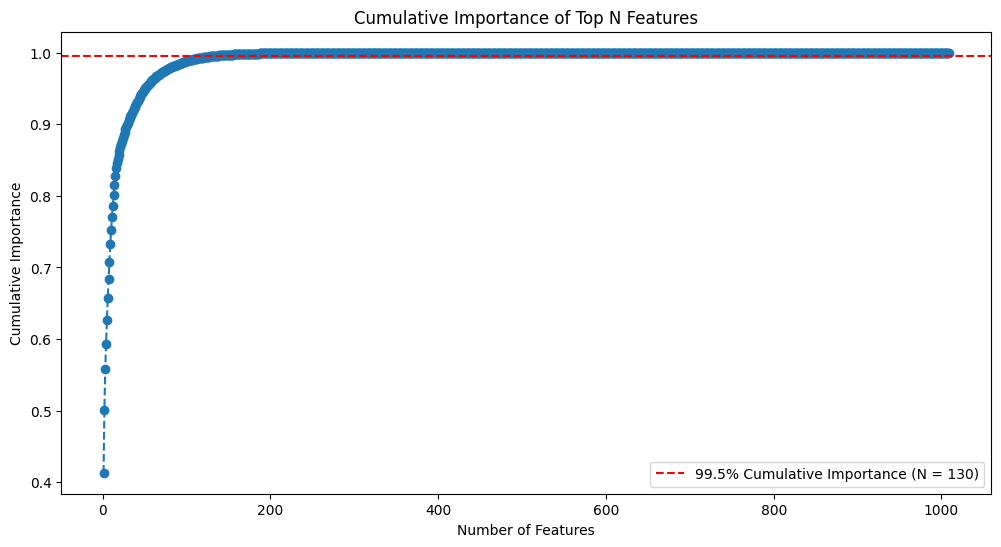

Number of features needed to preserve 99.5% of the variance: 130


In [ ]:
import matplotlib.pyplot as plt

# Calculate the cumulative sum of feature importances
cumulative_importance = np.cumsum(feature_importances['importance'].values)

# Find the number of features needed to preserve 99.5% variance
cutoff_index = np.where(cumulative_importance >= 0.995)[0][0] + 1

# Plot the cumulative importance
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_importance) + 1), cumulative_importance, marker='o', linestyle='--')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importance of Top N Features')

# Draw a horizontal line at 99.5% cumulative importance
plt.axhline(y=0.995, color='r', linestyle='--', label=f'99.5% Cumulative Importance (N = {cutoff_index})')
plt.legend()

plt.show()

print(f'Number of features needed to preserve 99.5% of the variance: {cutoff_index}')


## Training our Models
The models chosen for this project were Logistic Regression, Random Forest, and SVM. Logistic Regression was chosen due to its simplicity and ability to handle binary classification problems and will be measured as a baseline for our other models. Random Forest and SVM were chosen due to their specialty in handling high-dimensional datasets as well as strength in categorical features. These models are also well equipped to deal with non-linear data, which is a commonality in crime data and something that is initially expected in how the dataset's classes will fall under.

In [ ]:
print(X_train.shape)
print(X_test.shape)

(65105, 130)
(27903, 130)


### Logistic Regression
For the logistic regression model, the solver was changed to liblinear after some testing and discovering that the data had a strong linear seperation betweeen its classifications. The penalty was set to L1 as we have pruned much of the less meaningful features from the dataset beforehand. 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Logistic Regression
lr = LogisticRegression(random_state=1, class_weight='balanced', solver='liblinear', penalty='l1', C=1.0)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='f1_macro')
print("Logistic Regression F1 Macro (cross-validation):", np.mean(lr_scores))

Logistic Regression:
[[27782     0]
 [    0   121]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27782
           1       1.00      1.00      1.00       121

    accuracy                           1.00     27903
   macro avg       1.00      1.00      1.00     27903
weighted avg       1.00      1.00      1.00     27903

Logistic Regression F1 Macro (cross-validation): 0.998282883729364


### Random Forest

For Random Forest, much of the hyperparameters were kept the same, aside from changing class weights to be balanced to account for the imbalance of the classes in this dataset.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# RandomForest
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

rf_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='f1_macro')
print("Random Forest F1 Macro (cross-validation):", np.mean(rf_scores))

Random Forest:
[[27781     1]
 [   15   106]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27782
           1       0.99      0.88      0.93       121

    accuracy                           1.00     27903
   macro avg       1.00      0.94      0.96     27903
weighted avg       1.00      1.00      1.00     27903

Random Forest F1 Macro (cross-validation): 0.9644055393077482


### SVM

For SVM, there was extensive experimentation to tune the hyperparameters to their optimal setting. In the end, the kernel was set to linear since the dataset appears to have strong linear seperation between the two classes. Probability was used to allow for K-fold probability in classification for the model to reduce overfitting issues. Finally, class weight was set to balanced to account for the imbalanced dataset.

In [ ]:
from sklearn.svm import SVC

# SVM
svm = SVC(kernel='linear', C=1, class_weight='balanced', probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM:")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

svm_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='f1_macro')
print("SVM F1 Macro (cross-validation):", np.mean(svm_scores))

SVM:
[[27782     0]
 [    0   121]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27782
           1       1.00      1.00      1.00       121

    accuracy                           1.00     27903
   macro avg       1.00      1.00      1.00     27903
weighted avg       1.00      1.00      1.00     27903

SVM F1 Macro (cross-validation): 0.9974388117516266


## Results Discussion
The results of the three models indicate that both the Logistic Regression and Support Vector Machine (SVM) models achieved perfect performance on the test dataset, while the Random Forest model showed slightly lower performance. In the case of Logistic Regression, the model yielded an accuracy of 1.00, with perfect precision, recall, and F1-score for both classes. The cross-validated F1 Macro score was 0.9983, which supports the robustness of this model. The excellent performance of Logistic Regression suggests that the relationship between the features and the target variable in the dataset can be well-represented by a linear model.

The Random Forest model, on the other hand, exhibited slightly lower performance, with an accuracy of 1.00, but an F1-score of 0.93 for the homicides class. Despite the relatively lower performance in comparison to Logistic Regression and SVM, the model still achieved high precision and recall values. The cross-validated F1 Macro score for Random Forest was 0.9644, indicating that the model's performance is consistent across different data splits. The difference in performance between the Random Forest and the other two models may be attributed to the presence of a strong linear relationship between features and the target variable, which the tree-based model might not capture as efficiently as the linear models.

The SVM model achieved perfect performance similar to the Logistic Regression model. The accuracy, precision, recall, and F1-score for both classes were all 1.00, indicating that the SVM model can perfectly discriminate between the two classes. The cross-validated F1 Macro score was 0.9974, extremely close to Logistic Regression's cross-validated F1 Macro score, which further reinforces this model's exceptional performance. The success of the SVM model may be attributed to its ability to find the optimal decision boundary that separates the two classes in the dataset, especially given that the hyperparameters used were generally meant for a linear dataset.

In conclusion, the high performance of all three models demonstrates that the chosen features are highly predictive of the target variable. The perfect scores achieved by the Logistic Regression and SVM models indicate that a linear decision boundary is sufficient to separate the two classes, while the slightly lower performance of the Random Forest model suggests that the tree-based model might not be as effective in capturing the linear relationship between the features and the target variable due to potentially noisy features. 

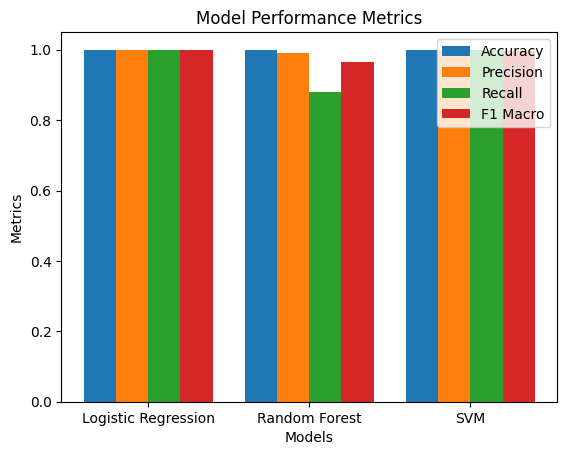

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics data
models = ['Logistic Regression', 'Random Forest', 'SVM']
accuracy = [1.00, 1.00, 1.00]
precision = [1.00, 0.99, 1.00]
recall = [1.00, 0.88, 1.00]
f1_macro = [0.9983, 0.9644, 0.9974]

# Set up bar chart
bar_width = 0.2
x = np.arange(len(models))

fig, ax = plt.subplots()
bar1 = ax.bar(x - bar_width*1.5, accuracy, bar_width, label='Accuracy')
bar2 = ax.bar(x - bar_width/2, precision, bar_width, label='Precision')
bar3 = ax.bar(x + bar_width/2, recall, bar_width, label='Recall')
bar4 = ax.bar(x + bar_width*1.5, f1_macro, bar_width, label='F1 Macro')

# Customize the chart
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('Model Performance Metrics')

# Display the chart
plt.show()



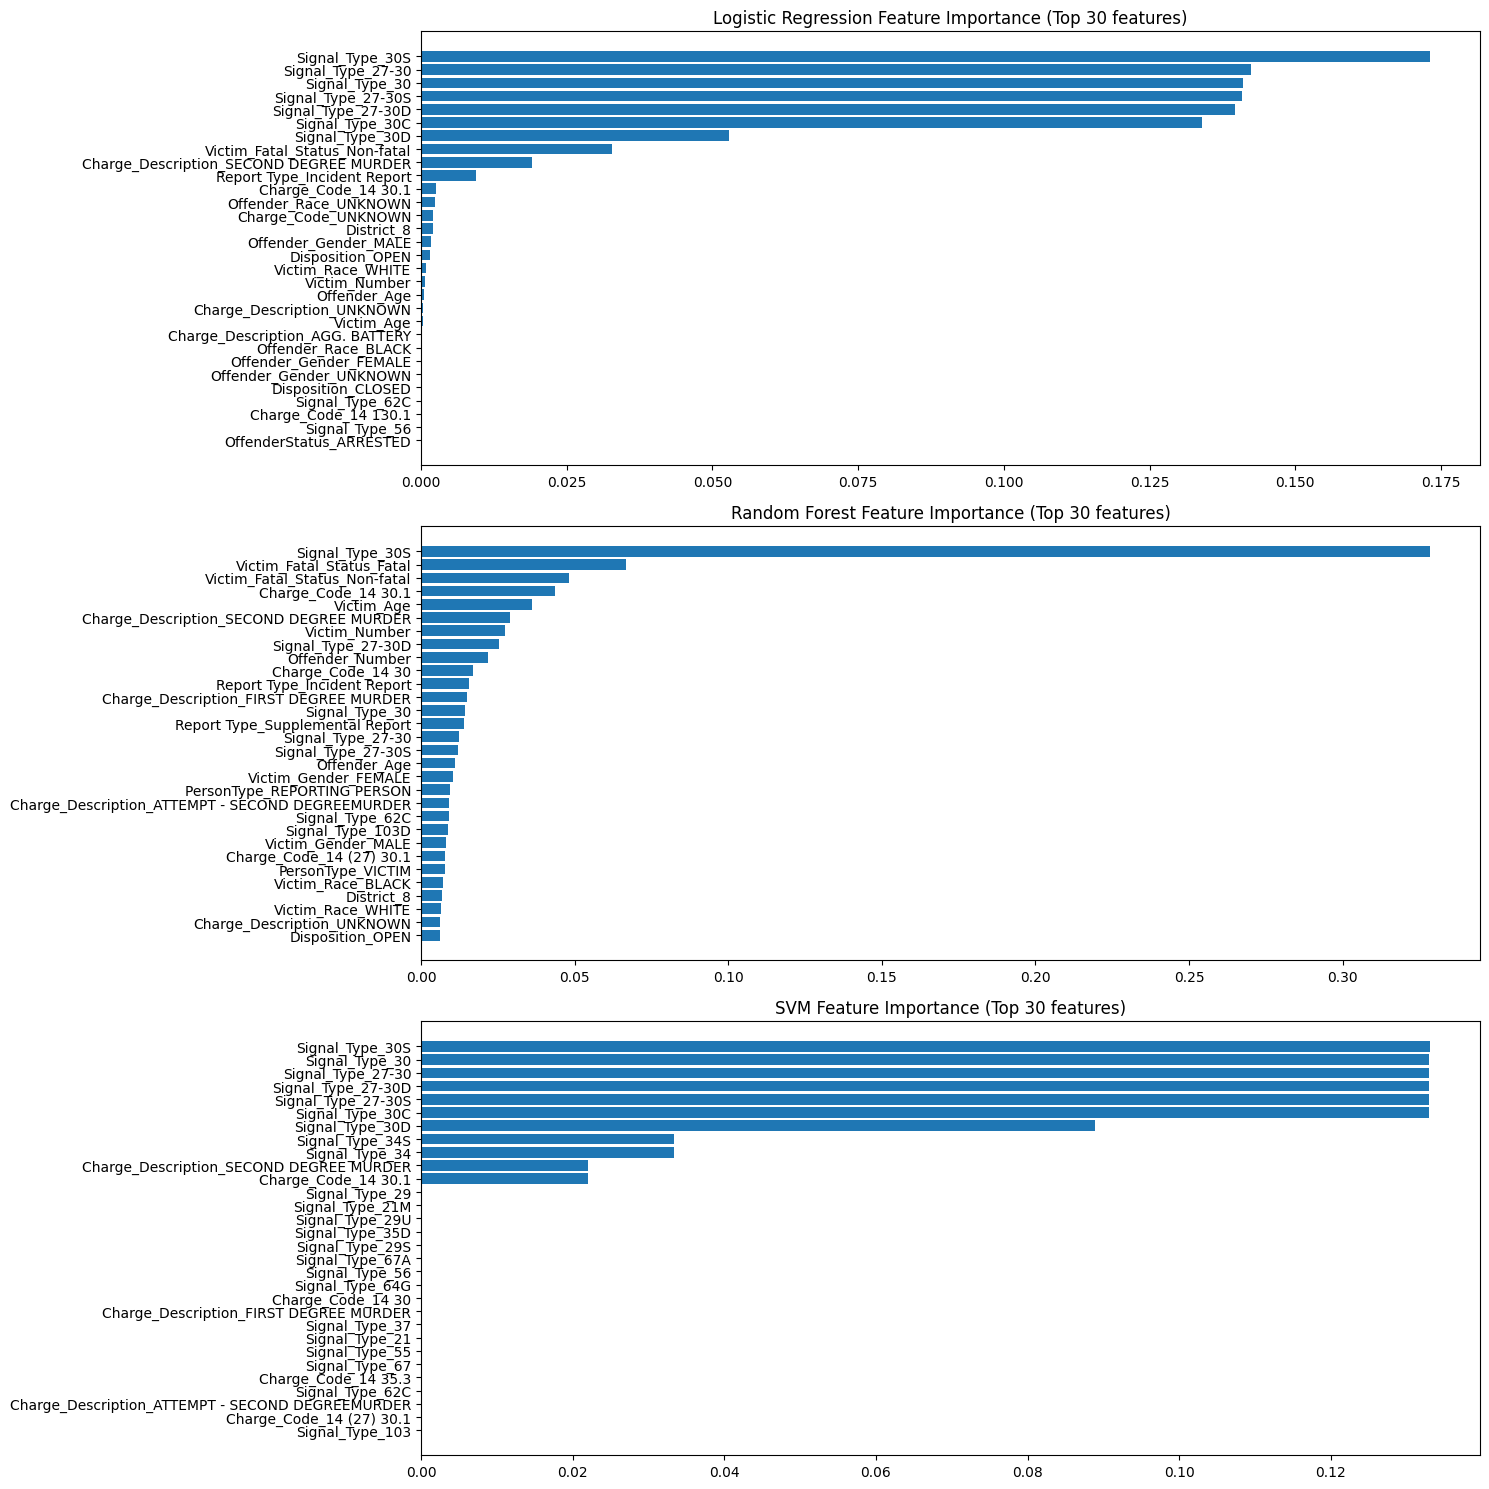

In [ ]:
feature_names = selected_features

# Feature importance for Logistic Regression
lr_feature_importance = np.abs(lr.coef_[0])
lr_feature_importance_normalized = lr_feature_importance / np.sum(lr_feature_importance)

# Feature importance for Random Forest
rf_feature_importance = rf.feature_importances_
rf_feature_importance_normalized = rf_feature_importance / np.sum(rf_feature_importance)

# Feature importance for SVM
svm_feature_importance = np.abs(svm.coef_[0])
svm_feature_importance_normalized = svm_feature_importance / np.sum(svm_feature_importance)

# Number of top features to display
num_features = 30

# Plot feature importance for all three models
fig, ax = plt.subplots(3, 1, figsize=(15, 15))

# Sort the features by importance and plot top N features
lr_sorted_idx = np.argsort(lr_feature_importance_normalized)[-num_features:]
ax[0].barh(feature_names[lr_sorted_idx], lr_feature_importance_normalized[lr_sorted_idx])
ax[0].set_title("Logistic Regression Feature Importance (Top {} features)".format(num_features))

rf_sorted_idx = np.argsort(rf_feature_importance_normalized)[-num_features:]
ax[1].barh(feature_names[rf_sorted_idx], rf_feature_importance_normalized[rf_sorted_idx])
ax[1].set_title("Random Forest Feature Importance (Top {} features)".format(num_features))

svm_sorted_idx = np.argsort(svm_feature_importance_normalized)[-num_features:]
ax[2].barh(feature_names[svm_sorted_idx], svm_feature_importance_normalized[svm_sorted_idx])
ax[2].set_title("SVM Feature Importance (Top {} features)".format(num_features))

plt.tight_layout()
plt.show()



The top features and their respective weights in each model depend on the learning approach used by the algorithm. While all three models highlight Signal_Type_30S as a crucial feature, the other important features vary based on how the model learns from the data and how the features contribute to the model's decision-making process. An interesting thing to note here is that Random Forest appeared to apply at least some importance to many more features than the other two more linear based models, which may have lead to its downfall in performance due to overfitting issues. However, overall the models generally had similar weights for each feature, suggesting there are generally strongly correlative features toward the classifications in this dataset.

## Conclusion
In conclusion, this report has provided valuable insights into the significance of various features in predicting crime-related outcomes using different machine learning models. Despite the hypothesized non-linear result of the dataset, we found that it was much more linear than expected, suggesting strong predictive capabilities of these models in other crime environments. With proper tuning, we found that all three models were extremely suitable for this task so long as the data is pre-processed well. By understanding the strengths and limitations of each model and the underlying relationships between features and the target variable, we can develop more accurate and robust predictive models for crime prevention and related applications.

The real-life implications of this analysis could be substantial, particularly in the area of crime prevention and law enforcement. By identifying the most influential features in predicting crime outcomes, policymakers and law enforcement agencies can prioritize resources and develop targeted interventions to address the root causes of crime. For instance, understanding the significance of specific signal types or victim demographics can help tailor community-based programs or allocate law enforcement resources more effectively. Moreover, the development of accurate predictive models can facilitate proactive policing strategies and enable law enforcement to identify potential crime hotspots or at-risk individuals, allowing for early interventions and ultimately leading to a safer society.






